In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
dire = 'catRawMags1305/catDir/'

In [23]:
dith1 = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_at_2605.dat',\
                      names=True)
dith2 = np.genfromtxt('catRawMags1305/catDir/jdan21laq_HOROLOGIUM-I_F814W_at_2605.dat',\
                      names=True)
dith3 = np.genfromtxt('catRawMags1305/catDir/jdan21lhq_HOROLOGIUM-I_F814W_at_2605.dat',\
                      names=True)
dith4 = np.genfromtxt('catRawMags1305/catDir/jdan21llq_HOROLOGIUM-I_F814W_at_2605.dat',\
                      names=True)

In [24]:
d1_cat = np.genfromtxt('catRawMags1305/catDir/jdan21l8q_HOROLOGIUM-I_F814W_at_2605.dat')
d2_cat = np.genfromtxt('catRawMags1305/catDir/jdan21laq_HOROLOGIUM-I_F814W_at_2605.dat')
d3_cat = np.genfromtxt('catRawMags1305/catDir/jdan21lhq_HOROLOGIUM-I_F814W_at_2605.dat')
d4_cat = np.genfromtxt('catRawMags1305/catDir/jdan21llq_HOROLOGIUM-I_F814W_at_2605.dat')

In [25]:
d1_catg = d1_cat[d1_cat[:,7]>=21]
d2_catg = d2_cat[d2_cat[:,7]>=21]
d3_catg = d3_cat[d3_cat[:,7]>=21]
d4_catg = d4_cat[d4_cat[:,7]>=21]

In [26]:
d1_g = dith1[dith1['magr']>=21]
d2_g = dith2[dith2['magr']>=21]
d3_g = dith3[dith3['magr']>=21]
d4_g = dith4[dith4['magr']>=21]

In [27]:
d1_idx = np.argsort(d1_g['magr'])[:50]
d2_idx = np.argsort(d2_g['magr'])[:50]
d3_idx = np.argsort(d3_g['magr'])[:50]
d4_idx = np.argsort(d4_g['magr'])[:50]

In [28]:
d1_50=d1_g[d1_idx]
d2_50=d2_g[d2_idx]
d3_50=d3_g[d3_idx]
d4_50=d4_g[d4_idx]

In [29]:
d1_cat50 = d1_catg[d1_idx]
d2_cat50 = d2_catg[d2_idx]
d3_cat50 = d3_catg[d3_idx]
d4_cat50 = d4_catg[d4_idx]

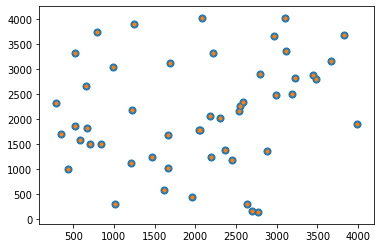

In [30]:
fig,ax = plt.subplots()

ax.scatter(d1_50['xt'],d1_50['yt'],s=50)
ax.scatter(d1_cat50[:,11],d1_cat50[:,12],s=10)

plt.show()

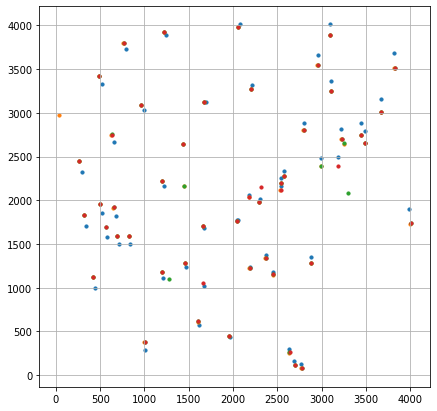

In [31]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.scatter(d1_50['xt'],d1_50['yt'],label='Dith1',s=10)   #c=d1_50['magr'])
ax.scatter(d2_50['xt'],d2_50['yt'],label='Dith2',s=10)   #c=d1_50['magr'])
ax.scatter(d3_50['xt'],d3_50['yt'],label='Dith3',s=10)   #c=d1_50['magr'])
ax.scatter(d4_50['xt'],d4_50['yt'],label='Dith4',s=10)   #c=d1_50['magr'])

plt.show()

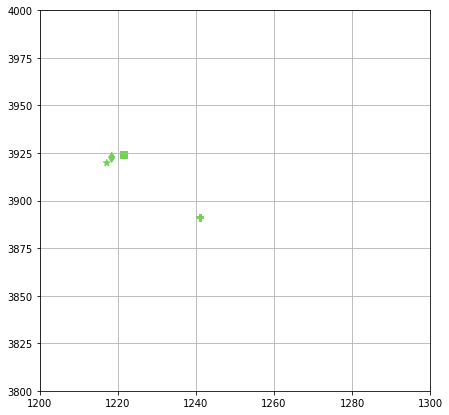

In [22]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.scatter(d1_50['xt'],d1_50['yt'],label='Dith1',s=50,c=d1_50['magr'],marker='P')
ax.scatter(d2_50['xt'],d2_50['yt'],label='Dith2',s=50,c=d1_50['magr'],marker='*')
ax.scatter(d3_50['xt'],d3_50['yt'],label='Dith3',s=50,c=d1_50['magr'],marker='s')
ax.scatter(d4_50['xt'],d4_50['yt'],label='Dith4',s=50,c=d1_50['magr'],marker='d')


ax.set_xlim(1200,1300)
ax.set_ylim(3800,4000)

plt.show()

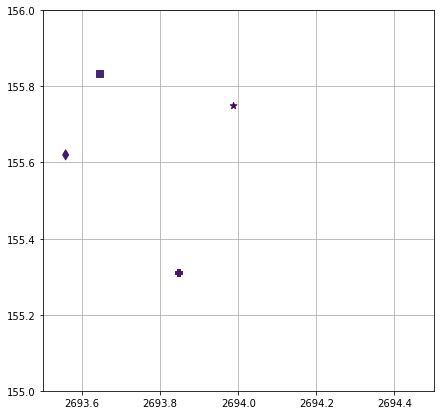

In [36]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.scatter(d1_50['xo'],d1_50['yo'],label='Dith1',s=50,c=d1_50['magr'],marker='P')
ax.scatter(d2_50['xo'],d2_50['yo'],label='Dith2',s=50,c=d1_50['magr'],marker='*')
ax.scatter(d3_50['xo'],d3_50['yo'],label='Dith3',s=50,c=d1_50['magr'],marker='s')
ax.scatter(d4_50['xo'],d4_50['yo'],label='Dith4',s=50,c=d1_50['magr'],marker='d')


ax.set_xlim(2693.5,2694.5)
ax.set_ylim(155,156)

plt.show()

In [179]:
matchtol=20
cat_arr = np.array([d2_50,d3_50,d4_50])

master = d1_50
d1_cat50 = d1_catg[d1_idx]

colNs = np.array(master.dtype.names)

xt = np.int(np.where(colNs=='xo')[0])
yt = np.int(np.where(colNs=='yo')[0])
xtstr = 'xo'
ytstr = 'yo'

magr = np.int(np.where(colNs=='magr')[0])
id = np.int(np.where(colNs=='id')[0])

# Create an array of zeros with columns equal to the number of non-master dithers to store the matching id for each source
matchids = np.zeros((len(d1_cat50), 3))
# master = np.hstack((d1_cat50, matchids))

# Loop through other images
for dd in range(3):
    cat = cat_arr[dd] 

    nF = True
    row = 0

    while (nF): # not finished
        matchrows = cat[(abs(master[row]['xo'] - cat['xo']) <= matchtol) & \
                        (abs(master[row]['yo'] - cat['yo']) <= matchtol)]

#         # Setting the proper column number to the matching index.
        if (len(matchrows) == 1):
            matchids[row][dd] = matchrows[0][id]
            row = row + 1
#             print('matched')

        elif (len(matchrows) > 1):
            magDif = np.zeros((len(matchrows),1))
            for mm in range(len(matchrows)):
                magDif[mm] = master[row][magr] - matchrows[mm][magr]
            small = np.argmin(magDif)
            matchids[row][dd] = matchrows[small][id]
            row += 1
#             print('magDiff')

        else:
            master = np.delete(master, row, 0)
            d1_cat50 = np.delete(d1_cat50, row, 0)
            matchids = np.delete(matchids,row,0)
#             print('deleted')

        if (row >= len(master)):
            nF = False

# header =  "flags RA DEC xr yr flux c_star magr id xc yc xt yt id2 id3 id4"
# form = "%d %1.7f %1.7f %1.4f %1.4f %1.4f %1.3f %1.4f %d %1.4f %1.4f %1.4f %1.4f %d %d %d"

# np.savetxt(dire+'matched50.dat',master, header=header, fmt=form)


In [61]:
cat_arr = np.array([d2_50,d3_50,d4_50])

In [163]:
d1_cat50.shape

(44, 13)

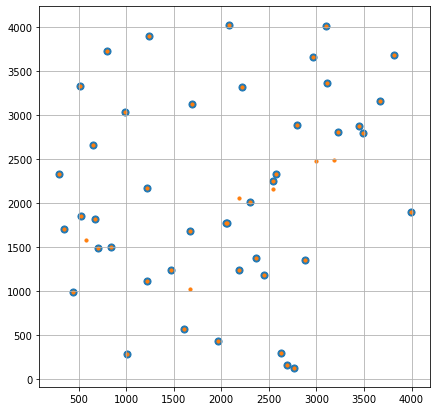

In [176]:
fig,ax = plt.subplots(figsize=(7,7))

ax.grid(True)
ax.scatter(d1_cat50[:,11],d1_cat50[:,12],label='Dith1',s=50)   #c=d1_50['magr'])
ax.scatter(d1_50['xo'],d1_50['yo'],label='Dith1',s=10) 

plt.show()

In [177]:
outArr = np.hstack((d1_cat50,matchids))

In [178]:
header =  "flags RA DEC xr yr flux c_star magr id xc yc xt yt id2 id3 id4"
form = "%d %1.7f %1.7f %1.4f %1.4f %1.4f %1.3f %1.4f %d %1.4f %1.4f %1.4f %1.4f %d %d %d"

# np.savetxt(dire+'matched50.dat',outArr, header=header, fmt=form)

In [205]:
# cat_arrA = np.array([d1_g,d2_g,d3_g,d4_g])
cat_arrA = np.array([d1_cat,d2_cat,d3_cat,d4_cat])

In [184]:
# cat_arrA = ([d1_cat50, d2_cat50, d3_cat50, d4_cat50])

In [207]:
max(d1_cat[:,id])

10476.0

In [198]:
len(d3_g)

10325

In [194]:
# len(d2_g)

9855

In [209]:
master = np.genfromtxt(dire+'matched50.dat',names=True)
masterCat = np.loadtxt(dire+'matched50.dat')

colNs = np.array(master.dtype.names)

ra_id = np.int(np.where(colNs=='RA')[0])
dec_id = np.int(np.where(colNs=='DEC')[0])
flu_id = np.int(np.where(colNs=='flux')[0])
fla_id = np.int(np.where(colNs=='flags')[0])
cs_id = np.int(np.where(colNs=='c_star')[0])
magr = np.int(np.where(colNs=='magr')[0])

xr = np.int(np.where(colNs=='xr')[0])
yr = np.int(np.where(colNs=='yr')[0])
xc = np.int(np.where(colNs=='xc')[0])
yc = np.int(np.where(colNs=='yc')[0])

id2 = np.int(np.where(colNs=='id2')[0])
id3 = np.int(np.where(colNs=='id3')[0])
id4 = np.int(np.where(colNs=='id4')[0])
# xt, yt are xo,yo in dithers 2-4 as the transformed positions 
# don't change for the first dither
xt = np.int(np.where(colNs=='xt')[0])
yt = np.int(np.where(colNs=='yt')[0])

id = np.int(np.where(colNs=='id')[0])
coordRows = masterCat[:,[ra_id,dec_id,flu_id,fla_id,cs_id]]

nCo = 4*int(9) # 4 is number of dithers
newCols = np.zeros((len(coordRows), nCo))

# rowsMast = np.transpose(masterCat)

jj = 0
cc = 0
while jj < 4:
    cat = cat_arrA[jj]

    if jj==0:
        idcol = id
    elif jj==1:
        idcol = id2
    elif jj==2:
        idcol = id3
    elif jj==3:
        idcol = id4

    newIDcol = masterCat[:,idcol]
    idx = np.asarray(newIDcol,int)

    reg = cat[idx]

    newCols[:,cc] = reg[:,magr]
    newCols[:,cc+jj+4] = reg[:,ra_id]
    newCols[:,cc+jj+5] = reg[:,dec_id]

    newCols[:,cc+jj+12] = reg[:,xr]
    newCols[:,cc+jj+13] = reg[:,yr]

    newCols[:,cc+jj+20] = reg[:,xc]
    newCols[:,cc+jj+21] = reg[:,yc]

    newCols[:,cc+jj+28] = reg[:,xt]
    newCols[:,cc+jj+29] = reg[:,yt]

    cc += 1
    jj += 1


magList = np.hstack((coordRows, newCols))

header = 'RA DEC flux flags c_star mag1 mag2 mag3 mag4 ra1 dec1 ra2 dec2 ra3 dec3 ra4 dec4 xr1 yr1 xc1 yc1 xt1 yt1 xr2 yr2 xc2 yc2 xt2 yt2 xr3 yr3 xc3 yc3 xt3 yt3 xr4 yr4 xc4 xc4 xt4 yt4'
form = '%1.7f %1.7f %1.4f %d %1.3f %1.4f %1.4f %1.4f %1.4f %1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.7f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f %1.4f'

np.savetxt(dire+'matched_w_MagsPos.dat',magList,header=header,fmt=form)


